# Analysing feminism and covid

How was the corpus created.

- adding a language filter

# Loading libraries and data

In [32]:
# We import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [33]:
# We import the data
#web_pages =  pd.read_csv('data/web-pages.csv', nrows=1000) #uncomment this line and comment the next one if you would prefer to play with the first x rows to spare memory and time.
web_pages =  pd.read_csv('data/AWAC2_webpage_feminism.csv', low_memory=False)
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content
0,20200310061121,theguardian.com,https://www.theguardian.com/world/americas,text/html,text/html,en,Americas | World | The Guardian Skip to main c...
1,20200310064025,mashable.com,https://sea.mashable.com/culture/9473/reminder...,text/html,text/html,en,Reminder: You don't have to watch 'Contagion' ...
2,20200310064255,thetimes.co.uk,https://www.thetimes.co.uk/,text/html,text/html,en,The Times & The Sunday Times Subscription Noti...
3,20200310101645,independent.co.uk,https://www.independent.co.uk/voices,text/html,text/html,en,Voices | The Independent Subscribe now Login S...
4,20200310032044,economist.com,https://www.economist.com/,text/html,text/html,en,"The Economist - World News, Politics, Economic..."
...,...,...,...,...,...,...,...
12570,20200421123941,insidephilanthropy.com,https://www.insidephilanthropy.com/home/2020/4...,text/html,text/html,en,Advocates Say Global COVID-19 Funding for Girl...
12571,20200421141110,wordpress.com,https://batjc.wordpress.com/pods-and-pod-mappi...,text/html,text/html,en,Pods and Pod Mapping Worksheet – Bay Area Tran...
12572,20200421141148,techsafety.org,https://www.techsafety.org/digital-services-du...,text/html,text/html,en,Digital Services During Public Health Crises —...
12573,20200421142809,philanthropynewsdigest.org,http://philanthropynewsdigest.org/columns/alli...,text/html,text/html,en,Alliance@PND | Columns | PND Login Register Su...


## Duplicates

How to deal with duplicates?

# Duplictes URLs (same datetime, same URLs)

In [35]:
# We create with pivot table the file that will interest us. We focus on URLs
web_pages_count_byDomain = web_pages.groupby(['url','crawl_date']).size()
web_pages_count_byDomain = web_pages_count_byDomain.sort_values(ascending=False)
web_pages_count_byDomain.to_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain = pd.read_csv('generated/web_pages_count_byDomain.csv', dtype = {'url':object,'crawl_date':str,'0':object})
web_pages_count_byDomain.dtypes

url           object
crawl_date    object
0             object
dtype: object

In [43]:
#we split the column
web_pages_count_byDomain['date']=web_pages_count_byDomain['crawl_date'].str.slice(stop=8)

#We retain only those where the 0 (number of tume it's crawled) == 2
mask=web_pages_count_byDomain['0']=='2'

web_pages_topURL = web_pages_count_byDomain[mask]
web_pages_topURL

,url,crawl_date,0,time,date
0,https://items.ssrc.org/just-environments/namin...,20210829025018,2,20210829,20210829
1,https://items.ssrc.org/just-environments/the-e...,20210828172531,2,20210828,20210828
2,https://covid19research.ssrc.org/grantee/re-de...,20211017143722,2,20211017,20211017
3,https://items.ssrc.org/tag/inequality/,20210829040801,2,20210829,20210829
4,https://www.nytimes.com/interactive/2020/obitu...,20211016114022,2,20211016,20211016
5,https://items.ssrc.org/tag/social-class/,20210829130223,2,20210829,20210829
6,https://items.ssrc.org/tag/inequality/,20210703185330,2,20210703,20210703
7,https://oglobo.globo.com/projetos/jornal-extra...,20200222001345,2,20200222,20200222
8,https://items.ssrc.org/author/malini-ranganathan/,20210828140028,2,20210828,20210828
9,https://items.ssrc.org/just-environments/hurri...,20210829012751,2,20210829,20210829


In [45]:
# Let's try a scatter plot
# source = data.cars()


# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['language'], bind='legend')

crawl_stream = (
    alt.Chart(web_pages_topURL)
        .mark_circle()
        .encode(
            alt.Tooltip("date"),
            alt.X('date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('url:O', stack='center', axis=None),
            alt.Color('url:N',
                scale=alt.Scale(scheme='category20b'),
            ),
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).interactive().add_selection(
            selection
        )
)

crawl_stream.properties(width=1000, height=500, title="Crawl frequency by language")

alt.Chart(...)

### And now by domain

In [76]:
#We reload web_pages, with the right columns types
web_pages =  pd.read_csv('data/AWAC2_webpage_feminism.csv', dtype = {'crawl_date':str, 'domain':object, 'url':object})
web_pages

#we split the column
web_pages['crawl_date'].astype(object)
web_pages['date']=web_pages['crawl_date'].str.slice(stop=8)

# We create with pivot table the file that will interest us. We focus on URLs
web_pages_count_byDomain = web_pages.groupby(['domain','date']).size()
web_pages_count_byDomain = web_pages_count_byDomain.sort_values(ascending=False)
web_pages_count_byDomain.to_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain = pd.read_csv('generated/web_pages_count_byDomain.csv', dtype = {'domain':object,'crawl_date':str,'0':int})
web_pages_count_byDomain

,domain,date,0
0,inumeraveis.com.br,20200827,415
1,infobae.com,20210226,381
2,elbierzodigital.com,20210423,373
3,inumeraveis.com.br,20201028,323
4,lavanguardia.com,20210423,284
...,...,...,...
3373,indy100.com,20210130,1
3374,inews.co.uk,20200404,1
3375,inews.co.uk,20200413,1
3376,info.cz,20200226,1


In [86]:
#we split the column
#web_pages_count_byDomain['date']=web_pages_count_byDomain['crawl_date'].str.slice(stop=8)

#We retain only those where the 0 (number of tume it's crawled) > 10
mask=web_pages_count_byDomain['0'] > 20

web_pages_topDomain = web_pages_count_byDomain[mask]
web_pages_topDomain

,domain,date,0
0,inumeraveis.com.br,20200827,415
1,infobae.com,20210226,381
2,elbierzodigital.com,20210423,373
3,inumeraveis.com.br,20201028,323
4,lavanguardia.com,20210423,284
...,...,...,...
84,alnavio.es,20210424,21
85,ssrc.org,20210311,21
86,feminis.ro,20200330,21
87,elmundotoday.com,20210423,21


In [91]:
# Let's try a scatter plot
# source = data.cars()


# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['language'], bind='legend')

crawl_stream = (
    alt.Chart(web_pages_topDomain)
        .mark_circle()
        .encode(
            alt.Tooltip("domain"),
            alt.X('date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('domain:O', stack='center', axis=None),
            alt.Color('domain:N',
                scale=alt.Scale(scheme='category20b'),
            ),
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).interactive().add_selection(
            selection
        )
)

crawl_stream.properties(width=800, height=400, title="Crawl frequency by language")

alt.Chart(...)

## Exploration of dataset

- Time and language distribution
- Time, Domain, language distribution

### Time distribution

In [3]:
# pd.pivot_table(web_pages,values='language',index=['crawl_date','domain'], columns='crawl_date')
web_pages_byCrawlDate_byLanguage = web_pages.groupby(['language','crawl_date']).size()
web_pages_byCrawlDate_byLanguage.to_csv('generated/web_pages_byCrawlDate_byLanguage.csv')
web_pages_byCrawlDate_byLanguage = pd.read_csv('generated/web_pages_byCrawlDate_byLanguage.csv', low_memory=False)
web_pages_byCrawlDate_byLanguage

,language,crawl_date,0
0,af,20201105072409,1
1,ar,20200511100358,1
2,ar,20200512105654,1
3,bg,20200511101209,1
4,bg,20200512110440,1
...,...,...,...
12526,uk,20200512110210,1
12527,ur,20200511100922,1
12528,ur,20200512110150,1
12529,vi,20200511101147,1


In [4]:
# Let's try a scatter plot
# source = data.cars()


# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['language'], bind='legend')

crawl_stream = (
    alt.Chart(web_pages_byCrawlDate_byLanguage)
        .mark_circle()
        .encode(
            alt.Tooltip("language"),
            alt.X('crawl_date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('language:O', stack='center', axis=None),
            alt.Color('language:N',
                scale=alt.Scale(scheme='category20b'),
            ),
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).interactive().add_selection(
            selection
        )
)

crawl_stream.properties(width=1000, height=500, title="Crawl frequency by language")

alt.Chart(...)

### Domain distribution

In [5]:
web_pages_count_byDomain = web_pages.groupby(['domain','language','crawl_date']).size()
web_pages_count_byDomain = web_pages_count_byDomain.sort_values(ascending=False)
web_pages_count_byDomain.to_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain = pd.read_csv('generated/web_pages_count_byDomain.csv')
web_pages_count_byDomain

,domain,language,crawl_date,0
0,aktualne.cz,cs,20200328092901,2
1,elpais.com,es,20200309212420,2
2,globo.com,pt,20200222001345,2
3,ssrc.org,en,20210703185330,2
4,uol.com.br,pt,20200529210154,2
...,...,...,...,...
12541,heraldo.es,es,20200224224929,1
12542,heraldo.es,es,20200410220336,1
12543,heraldodemexico.com.mx,es,20200315175044,1
12544,hetliefdagboek.com,nl,20200522223748,1


In [6]:
# Let's try a scatter plot
# source = data.cars()


# Another example of altair chart, in the form of a flowchart
alt.data_transformers.disable_max_rows()

selection = alt.selection_multi(fields=['language'], bind='legend')

crawl_stream = (
    alt.Chart(web_pages_count_byDomain)
        .mark_circle()
        .encode(
            alt.Tooltip("domain"),
            alt.X('crawl_date:O',
                axis=alt.Axis(domain=False, tickSize=0)
            ),
            alt.Y('language:O', stack='center', axis=None),
            alt.Color('language:N',
                scale=alt.Scale(scheme='category20b'),
            ),
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).interactive().add_selection(
            selection
        )
)

crawl_stream.properties(width=1000, height=500, title="by domain by date, tooltips= domain")

alt.Chart(...)

### Let's count words

In [21]:
# We use the english speaking part of the corpus

# We create a mask where language = en

mask=web_pages['language']=='en'

web_pages = web_pages[mask]
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content,content_lower
0,20200310061121,theguardian.com,https://www.theguardian.com/world/americas,text/html,text/html,en,Americas | World | The Guardian Skip to main c...,americas | world | the guardian skip to main c...
1,20200310064025,mashable.com,https://sea.mashable.com/culture/9473/reminder...,text/html,text/html,en,Reminder: You don't have to watch 'Contagion' ...,reminder: you don't have to watch 'contagion' ...
2,20200310064255,thetimes.co.uk,https://www.thetimes.co.uk/,text/html,text/html,en,The Times & The Sunday Times Subscription Noti...,the times & the sunday times subscription noti...
3,20200310101645,independent.co.uk,https://www.independent.co.uk/voices,text/html,text/html,en,Voices | The Independent Subscribe now Login S...,voices | the independent subscribe now login s...
4,20200310032044,economist.com,https://www.economist.com/,text/html,text/html,en,"The Economist - World News, Politics, Economic...","the economist - world news, politics, economic..."
...,...,...,...,...,...,...,...,...
12570,20200421123941,insidephilanthropy.com,https://www.insidephilanthropy.com/home/2020/4...,text/html,text/html,en,Advocates Say Global COVID-19 Funding for Girl...,advocates say global covid-19 funding for girl...
12571,20200421141110,wordpress.com,https://batjc.wordpress.com/pods-and-pod-mappi...,text/html,text/html,en,Pods and Pod Mapping Worksheet – Bay Area Tran...,pods and pod mapping worksheet – bay area tran...
12572,20200421141148,techsafety.org,https://www.techsafety.org/digital-services-du...,text/html,text/html,en,Digital Services During Public Health Crises —...,digital services during public health crises —...
12573,20200421142809,philanthropynewsdigest.org,http://philanthropynewsdigest.org/columns/alli...,text/html,text/html,en,Alliance@PND | Columns | PND Login Register Su...,alliance@pnd | columns | pnd login register su...


In [20]:
# we transform a list of words into string with lower case only
web_pages['content_lower'] = web_pages['content'].astype('string').str.lower()
web_pages

/var/folders/90/j99p488148vcmjxgs16_mq0j42556r/T/ipykernel_81696/1306395590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web_pages['content_lower'] = web_pages['content'].astype('string').str.lower()


,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content,content_lower
0,20200310061121,theguardian.com,https://www.theguardian.com/world/americas,text/html,text/html,en,Americas | World | The Guardian Skip to main c...,americas | world | the guardian skip to main c...
1,20200310064025,mashable.com,https://sea.mashable.com/culture/9473/reminder...,text/html,text/html,en,Reminder: You don't have to watch 'Contagion' ...,reminder: you don't have to watch 'contagion' ...
2,20200310064255,thetimes.co.uk,https://www.thetimes.co.uk/,text/html,text/html,en,The Times & The Sunday Times Subscription Noti...,the times & the sunday times subscription noti...
3,20200310101645,independent.co.uk,https://www.independent.co.uk/voices,text/html,text/html,en,Voices | The Independent Subscribe now Login S...,voices | the independent subscribe now login s...
4,20200310032044,economist.com,https://www.economist.com/,text/html,text/html,en,"The Economist - World News, Politics, Economic...","the economist - world news, politics, economic..."
...,...,...,...,...,...,...,...,...
12570,20200421123941,insidephilanthropy.com,https://www.insidephilanthropy.com/home/2020/4...,text/html,text/html,en,Advocates Say Global COVID-19 Funding for Girl...,advocates say global covid-19 funding for girl...
12571,20200421141110,wordpress.com,https://batjc.wordpress.com/pods-and-pod-mappi...,text/html,text/html,en,Pods and Pod Mapping Worksheet – Bay Area Tran...,pods and pod mapping worksheet – bay area tran...
12572,20200421141148,techsafety.org,https://www.techsafety.org/digital-services-du...,text/html,text/html,en,Digital Services During Public Health Crises —...,digital services during public health crises —...
12573,20200421142809,philanthropynewsdigest.org,http://philanthropynewsdigest.org/columns/alli...,text/html,text/html,en,Alliance@PND | Columns | PND Login Register Su...,alliance@pnd | columns | pnd login register su...


In [22]:
# we load in a dataframe the column 'content'
# content=web_pages['content']

# we import stopwords from nltk
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# We remove stopwords from the dataframe

web_pages['content_clean'] = web_pages['content_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/frederic.clavert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content,content_lower,content_clean
0,20200310061121,theguardian.com,https://www.theguardian.com/world/americas,text/html,text/html,en,Americas | World | The Guardian Skip to main c...,americas | world | the guardian skip to main c...,americas | world | guardian skip main content ...
1,20200310064025,mashable.com,https://sea.mashable.com/culture/9473/reminder...,text/html,text/html,en,Reminder: You don't have to watch 'Contagion' ...,reminder: you don't have to watch 'contagion' ...,reminder: watch 'contagion' - culture <img hei...
2,20200310064255,thetimes.co.uk,https://www.thetimes.co.uk/,text/html,text/html,en,The Times & The Sunday Times Subscription Noti...,the times & the sunday times subscription noti...,times & sunday times subscription notification...
3,20200310101645,independent.co.uk,https://www.independent.co.uk/voices,text/html,text/html,en,Voices | The Independent Subscribe now Login S...,voices | the independent subscribe now login s...,voices | independent subscribe login subscribe...
4,20200310032044,economist.com,https://www.economist.com/,text/html,text/html,en,"The Economist - World News, Politics, Economic...","the economist - world news, politics, economic...","economist - world news, politics, economics, b..."
...,...,...,...,...,...,...,...,...,...
12570,20200421123941,insidephilanthropy.com,https://www.insidephilanthropy.com/home/2020/4...,text/html,text/html,en,Advocates Say Global COVID-19 Funding for Girl...,advocates say global covid-19 funding for girl...,advocates say global covid-19 funding girls ca...
12571,20200421141110,wordpress.com,https://batjc.wordpress.com/pods-and-pod-mappi...,text/html,text/html,en,Pods and Pod Mapping Worksheet – Bay Area Tran...,pods and pod mapping worksheet – bay area tran...,pods pod mapping worksheet – bay area transfor...
12572,20200421141148,techsafety.org,https://www.techsafety.org/digital-services-du...,text/html,text/html,en,Digital Services During Public Health Crises —...,digital services during public health crises —...,digital services public health crises — techno...
12573,20200421142809,philanthropynewsdigest.org,http://philanthropynewsdigest.org/columns/alli...,text/html,text/html,en,Alliance@PND | Columns | PND Login Register Su...,alliance@pnd | columns | pnd login register su...,alliance@pnd | columns | pnd login register su...


In [24]:
#Let's now lemmatize

import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

web_pages['content_clean'] = web_pages['content_clean'].apply(lemmatize_text)


In [25]:
# On modifie le type de la colone to string
web_pages['content_clean'].to_csv('generated/content_clean.csv')

# content_clean = str(web_pages['content_clean'])
content_clean = pd.read_csv('generated/content_clean.csv', low_memory=False)

In [26]:
content_clean['content_clean'] = content_clean['content_clean'].str.lower().str.replace('[^\w\s]','', regex=True)
 
 
words_count = content_clean['content_clean'].str.split(expand=True).stack().value_counts().reset_index()
 
words_count.columns = ['Word', 'Frequency'] 
 
words_count

,Word,Frequency
0,2020,59694
1,new,47344
2,social,37760
3,research,32610
4,read,29490
...,...,...
254700,21912197,1
254701,health9512,1
254702,bioculturaldo,1
254703,httpsdoiorg101002ajpa20983,1


In [27]:
words_count.to_csv('generated/words_count.csv')

## Topic modeling

In [92]:
# set up

# to install the required packages. Uncomment the two next lines if necessary
# !pip install --upgrade pip
# !pip install pandas seaborn sklearn pyldavis

%pylab inline
import warnings                         # Disable some warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
#from dataiku import pandasutils as pdu
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text 

from sklearn.decomposition import LatentDirichletAllocation,NMF
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
from stop_words import get_stop_words

Populating the interactive namespace from numpy and matplotlib


In [93]:
# First, we load web-pages.csv as a dataframe
pd.read_csv('data/AWAC2_webpage_feminism.csv', low_memory=False) # add nrows = 1000 to load only the first 1000 lines.

# We create a mask where the language column = en
web_pages_mask_en = web_pages['language']=='en'

# We apply this mask to web_pages so that our new dataframe is web_pages_en
web_pages_en = web_pages[web_pages_mask_en]

In [94]:
#We display our dataframe web_pages_en
web_pages_en

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content,date
0,20200310061121,theguardian.com,https://www.theguardian.com/world/americas,text/html,text/html,en,Americas | World | The Guardian Skip to main c...,20200310
1,20200310064025,mashable.com,https://sea.mashable.com/culture/9473/reminder...,text/html,text/html,en,Reminder: You don't have to watch 'Contagion' ...,20200310
2,20200310064255,thetimes.co.uk,https://www.thetimes.co.uk/,text/html,text/html,en,The Times & The Sunday Times Subscription Noti...,20200310
3,20200310101645,independent.co.uk,https://www.independent.co.uk/voices,text/html,text/html,en,Voices | The Independent Subscribe now Login S...,20200310
4,20200310032044,economist.com,https://www.economist.com/,text/html,text/html,en,"The Economist - World News, Politics, Economic...",20200310
...,...,...,...,...,...,...,...,...
12570,20200421123941,insidephilanthropy.com,https://www.insidephilanthropy.com/home/2020/4...,text/html,text/html,en,Advocates Say Global COVID-19 Funding for Girl...,20200421
12571,20200421141110,wordpress.com,https://batjc.wordpress.com/pods-and-pod-mappi...,text/html,text/html,en,Pods and Pod Mapping Worksheet – Bay Area Tran...,20200421
12572,20200421141148,techsafety.org,https://www.techsafety.org/digital-services-du...,text/html,text/html,en,Digital Services During Public Health Crises —...,20200421
12573,20200421142809,philanthropynewsdigest.org,http://philanthropynewsdigest.org/columns/alli...,text/html,text/html,en,Alliance@PND | Columns | PND Login Register Su...,20200421


In [95]:
#we display the columns so that we can choose the right one to process the topic modelling
web_pages_en.columns

Index(['crawl_date', 'domain', 'url', 'mime_type_web_server', 'mime_type_tika',
       'language', 'content', 'date'],
      dtype='object')

In [96]:
# We define the column that we will choose for the topic modelling
raw_text_col_en = "content"
# We create the dataframe with the "content" column only
raw_text_en = web_pages_en[raw_text_col_en]
# We remove the NaN to be sure
raw_text_en = raw_text_en.dropna()
# We display the result (to be sure we did what we wanted to do)
raw_text_en

0        Americas | World | The Guardian Skip to main c...
1        Reminder: You don't have to watch 'Contagion' ...
2        The Times & The Sunday Times Subscription Noti...
3        Voices | The Independent Subscribe now Login S...
4        The Economist - World News, Politics, Economic...
                               ...                        
12570    Advocates Say Global COVID-19 Funding for Girl...
12571    Pods and Pod Mapping Worksheet – Bay Area Tran...
12572    Digital Services During Public Health Crises —...
12573    Alliance@PND | Columns | PND Login Register Su...
12574    Advocates Say Global COVID-19 Funding for Girl...
Name: content, Length: 5002, dtype: object

In [97]:
# we remove the stopwords

# Uncomment the next line to define custom stopwords
#custom_stop_words = [u'did', u'good', u'right', u'said', u'does', u'way',u'edu', u'com', u'mail', u'thanks', u'post', u'address', u'university', u'email', u'soon', u'article',u'people', u'god', u'don', u'think', u'just', u'like', u'know', u'time', u'believe', u'say',u'don', u'just', u'think', u'probably', u'use', u'like', u'look', u'stuff', u'really', u'make', u'isn']

stop_words_en = text.ENGLISH_STOP_WORDS #.union(custom_stop_words) - add this part if you added custom stop words

In [98]:
#We first initialise a CountVectorizer() object and then apply the fit_transform method to the text.

cnt_vectorizer_en = CountVectorizer(stop_words = stop_words_en,lowercase = True,
                    token_pattern = r'\b[a-zA-Z]{3,}\b', max_df = 0.85, min_df = 2)

text_cnt_en = cnt_vectorizer_en.fit_transform(raw_text_en)

print(text_cnt_en.shape)

(5002, 95446)


In [99]:
# We first initialise a TfidfVectorizer() object and then apply the fit_transform method to the text.

tfidf_vectorizer_en = TfidfVectorizer(strip_accents = 'unicode',stop_words = stop_words_en,lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b', max_df = 0.75, min_df = 0.02)

text_tfidf_en = tfidf_vectorizer_en.fit_transform(raw_text_en)

print(text_tfidf_en.shape)

(5002, 7766)


In [100]:
# We go for LDA

n_topics = 25
topics_model_en = LatentDirichletAllocation(n_topics, random_state=0)
topics_model_en.fit(text_tfidf_en)

n_top_words = 25
feature_names_en = tfidf_vectorizer_en.get_feature_names()

def get_top_words_topic(topic_idx):
    topic = topics_model_en.components_[topic_idx]
   
    print( [feature_names_en[i] for i in topic.argsort()[:-n_top_words - 1:-1]] )
    
for topic_idx, topic in enumerate(topics_model_en.components_):
    print ("Topic #%d:" % topic_idx )
    get_top_words_topic(topic_idx)
dict_topic_name = {i: "topic_"+str(i) for i in range(n_topics)}
#dict_topic_name = my_dict_topic_name #Define here your own name mapping and uncomment this !    print ("")

Topic #0:
['mainstreaming', 'dominate', 'dated', 'elusive', 'gilded', 'cultivating', 'ideologies', 'fraught', 'inheritance', 'seema', 'unrest', 'motivated', 'chest', 'managers', 'deepening', 'sakamoto', 'screens', 'wala', 'baraka', 'companion', 'rots', 'repeated', 'minded', 'chika', 'meunier']

Topic #1:
['inbox', 'institutions', 'authoritarian', 'populism', 'parties', 'check', 'prisons', 'political', 'silent', 'cosmopolitan', 'rise', 'preview', 'majorities', 'catch', 'episodes', 'authority', 'majority', 'peak', 'democracies', 'european', 'cambridge', 'western', 'resilience', 'party', 'explanation']

Topic #2:
['toxicity', 'workshop', 'elites', 'industry', 'online', 'platforms', 'presented', 'knight', 'journalists', 'roundtable', 'users', 'media', 'technological', 'developers', 'imagined', 'academics', 'individuals', 'offline', 'publics', 'lisa', 'internet', 'argues', 'illinois', 'simply', 'importantly']

Topic #3:
['resistance', 'italian', 'war', 'partisan', 'fought', 'italy', 'northe

/Users/frederic.clavert/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:xlabel='topic'>

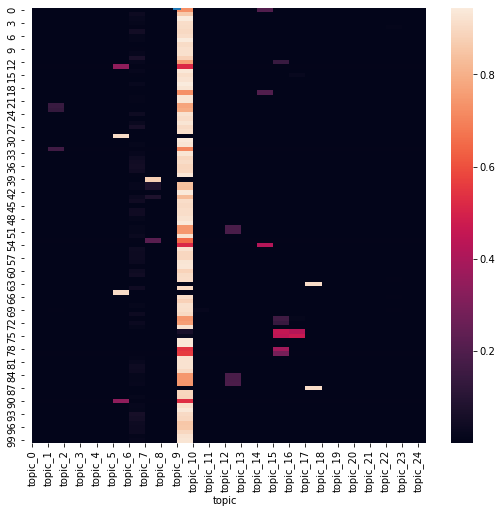

In [103]:
dict_topic_name = {i: "topic_"+str(i) for i in range(n_topics)}
#dict_topic_name = my_dict_topic_name #Define here your own name mapping and uncomment this !

# retrieve the document-topic matrix

document_model = pd.DataFrame(topics_model_en.transform(text_tfidf_en))
document_model.columns.name = 'topic'
document_model.rename(columns = dict_topic_name, inplace = True) #naming topics

plt.figure(figsize=(9,8))
sns.heatmap(document_model.sort_index()[:100]) #we limit here to the first 10 texts

<AxesSubplot:xlabel='topic'>

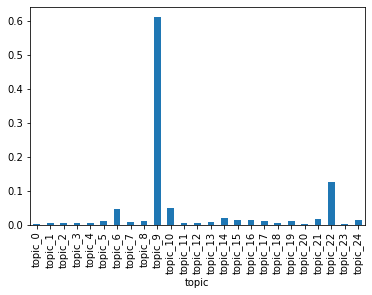

In [104]:
topics_proportion = document_model.sum()/document_model.sum().sum()
topics_proportion.plot(kind = "bar")

## Network analysis

- going to the webgraph dataset and select all line with 'feminism' as anchor text